# Introduction to Computer Vision with PyTorch

## 1. What is Computer Vision?

Computer vision is a field of artificial intelligence (AI) that enables machines to interpret and make decisions based on visual data - such as images and videos - much like humans do. From recognizing faces in photos to enabling self-driving cars to detect pedestrians, computer vision is at the heart of many modern applications. It combines image processing, pattern recognition, and deep learning to extract meaningful information from raw pixel data.

We will be using Convolutional Neural Networks for our tasks. We are not really going to go into the details of the architectures and functioning of these networks - it's out of the scope of this course - but you can find details at **entropic theory of information**.


Before starting to code for real, let's have a look at some important libraries we may want to use for computer vision problems.

| PyTorch module              | What does it do?                                                                                                                                                             |
|----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`torchvision`](https://docs.pytorch.org/vision/stable/index.html#torchvision)              | Contains datasets, model architectures and image transformations often used for computer vision problems.                                                                  |
| [`torchvision.datasets`](https://docs.pytorch.org/vision/stable/datasets.html#datasets)     | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://docs.pytorch.org/vision/stable/models.html#models-and-pre-trained-weights)       | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.                |
| [`torchvision.transforms`](https://docs.pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images)   | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.                 |


In [1]:
# torch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


### 1.1 Get a Dataset

We want to use the [`FashionMNIST`](https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#fashionmnist) dataset from `torchvision.datasets`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training datasets or the test?
    download=True, # do we want to download it?
    transform=ToTensor(),  # what kind of transformation do we want to apply on data?
    target_transform=None # how do we want to transform the labels (targets) ?
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.51MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 137kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.64MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.9MB/s]


In [4]:
# Setup testing data
test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # do we want the training datasets or the test?
    download=True, # do we want to download it?
    transform=ToTensor(),  # what kind of transformation do we want to apply on data?
    target_transform=None # how do we want to transform the labels (targets) ?
)

Let's check out our data

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# see the first training example
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Looks like the `ToTensor()` transform did its work.

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
# check the shapes
print(f"Image shape: {image.shape} <- [color_channels, height, width];\nImage label: {label}")

Image shape: torch.Size([1, 28, 28]) <- [color_channels, height, width];
Image label: 9


> **(!!) Note:** PyTorch uses the **CHW** format for images, meaning the dimensions are ordered as **Channels × Height × Width**. When working with batches of images, the format becomes **NCHW**, where **N** is the batch size. This is different from many image libraries like PIL or OpenCV, which use **HWC** format. Make sure to convert your image tensors accordingly when feeding them into a model.


Why just one color? Well, the MNIST dataset is composed of black and white images, so just one channel.

![Example of encoding an RGB image](https://github.com/MatteoFalcioni/PyTorch_basics/blob/main/imgs/03-fashion-mnist-slide.png?raw=1)

### 1.2 Visualize our Data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

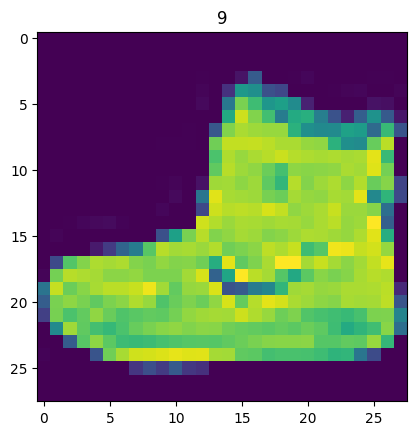

In [14]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1,2,0))  # change from CHW -> HWC (torch format -> python format)
plt.title(label)

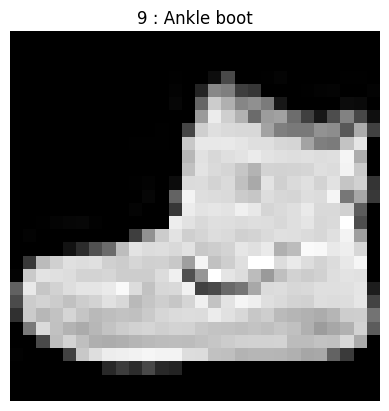

In [20]:
# in gray scale
plt.imshow(image.permute(1,2,0), cmap="gray")
plt.title(f"{label} : {class_names[label]}")
plt.axis(False);

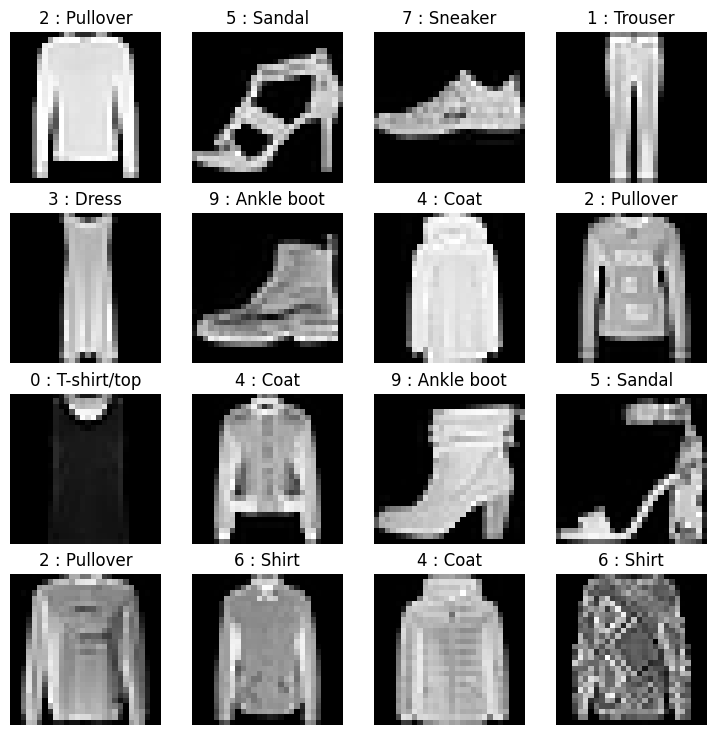

In [26]:
# Plot more (random) images
torch.manual_seed(123)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx  = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.permute(1,2,0), cmap="gray")
  plt.title(f"{label} : {class_names[label]}")
  plt.axis(False)

## 2. Prepare a Dataloader